In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from arcgis.features import GeoAccessor, GeoSeriesAccessor

sdf = pd.DataFrame.spatial.from_featureclass(r"G:\courses\qmsa\Chapter18\Chapter18.gdb\USA_Counties_2016")
sdf

,OBJECTID,OBJECTID_1,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2000,POP00_SQMI,POP2010,...,Teen_Birth_Rate,Percent_Uninsured,Graduation_Rate,Drug_Overdose_Mortality_Rate,Motor_Vehicle_Mortality_Rate,Homicide_Rate,Percent_Rural,Quality_of_Life_Quartile,Length_of_Life_Quartile,SHAPE
0,1,1,Lake of the Woods,Minnesota,27,077,27077,4522,2.5,3935,...,23.48,6.40,NaN,NaN,NaN,NaN,100.00,3.0,3.0,"{'rings': [[[48953.072899997234, 1060039.71229..."
1,2,2,Ferry,Washington,53,019,53019,7260,3.2,7626,...,26.39,11.88,NaN,NaN,28.06,NaN,100.00,4.0,4.0,"{'rings': [[[-1700997.8681999967, 1207941.3803..."
2,3,3,Stevens,Washington,53,065,53065,40066,15.8,43965,...,27.56,8.54,85.42,15.17,18.96,3.27,79.21,4.0,3.0,"{'rings': [[[-1595383.5684999973, 1192593.4226..."
3,4,4,Okanogan,Washington,53,047,53047,39564,7.4,40731,...,47.66,14.50,84.07,15.28,21.08,3.80,79.99,4.0,3.0,"{'rings': [[[-1710065.1621000022, 1209073.2917..."
4,5,5,Pend Oreille,Washington,53,051,53051,11732,8.2,13023,...,23.71,7.58,86.53,NaN,24.17,NaN,83.11,4.0,4.0,"{'rings': [[[-1570303.2762999982, 1296843.7124..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,3105,3105,LaGrange,Indiana,18,087,18087,34909,90.3,38321,...,21.26,25.97,92.50,NaN,16.14,NaN,91.62,1.0,1.0,"{'rings': [[[856835.071800001, 328878.19319999..."
3105,3106,3106,Steuben,Indiana,18,151,18151,33214,103.0,34449,...,31.93,11.56,81.02,10.70,15.45,NaN,67.25,1.0,2.0,"{'rings': [[[928825.5485000014, 336886.8960000..."
3106,3107,3107,Pittsylvania,Virginia,51,143,51143,61745,63.1,62390,...,23.25,12.22,88.00,8.05,21.70,3.88,85.63,2.0,3.0,"{'rings': [[[1443580.5571999997, -141077.84650..."
3107,3108,3108,Danville,Virginia,51,590,51590,48411,1102.8,44749,...,45.44,11.76,73.00,15.82,10.39,16.09,4.52,4.0,4.0,"{'rings': [[[1459902.2104000002, -132517.85370..."


In [2]:
for col in sdf.columns: 
    print(col) 

OBJECTID
OBJECTID_1
NAME
STATE_NAME
STATE_FIPS
CNTY_FIPS
FIPS
POP2000
POP00_SQMI
POP2010
POP10_SQMI
WHITE
BLACK
AMERI_ES
ASIAN
HAWN_PI
OTHER
MULT_RACE
HISPANIC
MALES
FEMALES
AGE_UNDER5
AGE_5_17
AGE_18_21
AGE_22_29
AGE_30_39
AGE_40_49
AGE_50_64
AGE_65_UP
MED_AGE
MED_AGE_M
MED_AGE_F
HOUSEHOLDS
AVE_HH_SZ
HSEHLD_1_M
HSEHLD_1_F
MARHH_CHD
MARHH_NO_C
MHH_CHILD
FHH_CHILD
FAMILIES
AVE_FAM_SZ
HSE_UNITS
VACANT
OWNER_OCC
RENTER_OCC
NO_FARMS07
AVG_SIZE07
CROP_ACR07
AVG_SALE07
SQMI
average_summer_precip
average_winter_precip
averge_summer_temperature
averge_winter_temperature
elevation
land_cover
Poverty_Estimate_All_Ages
Poverty_Percent_All_Ages
Poverty_Percent_Under_Age_18
Median_Household_Income
demVotes
repVotes
totalvotes
dem
percent_dem
Percent_Fair_Poor_Health
Percent_Smokers
Percent_Obese
Teen_Birth_Rate
Percent_Uninsured
Graduation_Rate
Drug_Overdose_Mortality_Rate
Motor_Vehicle_Mortality_Rate
Homicide_Rate
Percent_Rural
Quality_of_Life_Quartile
Length_of_Life_Quartile
SHAPE


3109


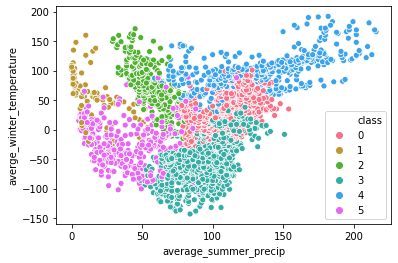

In [3]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

xt = 'average_summer_precip'
yt = 'averge_winter_temperature'
y2 = 'averge_summer_temperature'
y3 = 'average_winter_precip'

# define dataset
df = sdf[[xt, yt, y2, y3]]
df = df.fillna(1000)
# define the model
model = GaussianMixture(n_components=6)
# fit model and predict clusters
yhat = model.fit_predict(df)
# retrieve unique clusters
clusters = unique(yhat)
print(len(yhat))
a=pd.Series(yhat)
a.name = "class"
dfout = df.join(a)

pal = sns.color_palette("husl", 6)
g=sns.scatterplot(x=xt, y=yt, hue="class", data=dfout, palette=pal);

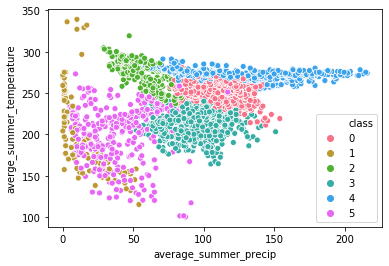

In [4]:
g2=sns.scatterplot(x=xt, y=y2, hue="class", data=dfout, palette=pal);

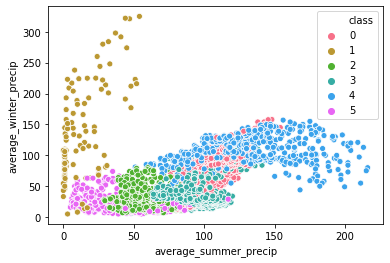

In [5]:
g3=sns.scatterplot(x=xt, y=y3, hue="class", data=dfout, palette=pal);

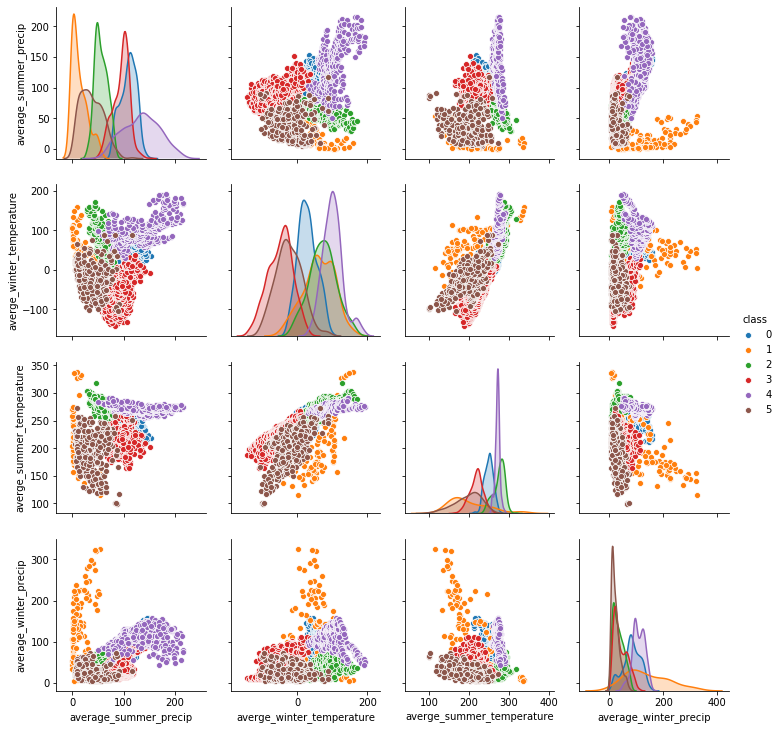

In [6]:
sns.pairplot(dfout, hue='class')

In [7]:
joinedDate = sdf.join(a)
outputLOC = r"G:\courses\qmsa\Chapter18\Chapter18.gdb\USA_Counties_" + "GaussianClustering"
joinedDate.spatial.to_featureclass(location=outputLOC)

'G:\\courses\\qmsa\\Chapter18\\Chapter18.gdb\\USA_Counties_GaussianClustering'

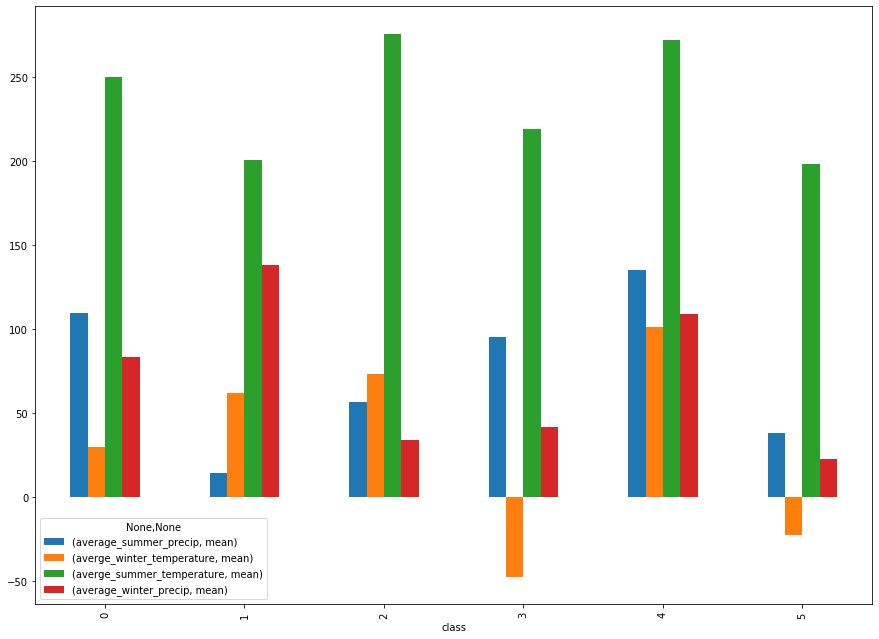

In [13]:
dfout.groupby('class').agg(['mean']).plot.bar(figsize=(15,11))